# Football Match Outcome Predictor
## Problem Statement
My goal is to build a model to predict the outcome of a football match, given data for the past 9
years. All the football matches from 2009 to 2017 are covered in the dataset. 

Based on the dataset provided, my goal is to come up with an optimal solution to predict whether a Home Team would win or lose or draw a game, represented by column name `FTR` for the year of `2017-2018`.

I have to come up with multiple approaches and choose the one that performs the best. 

I am provided with the training dataset: `train.csv` and testing dataset: `test.csv` to start the assignment. I have observed that the train and test datasets are not randomly sampled which is necessary to maintain the chronological order which ensures that all events of our train dataset takes place before an actual event of test dataset.

## Dataset
### About The Data
The data is collected from http://www.football-data.co.uk/ and consists of different leagues.

### Data Dictionary
All data is provided in `csv` format. In order to understand/interpret the data, detailed description about each column/feature/variable is given alongside the abbreviation/acronym in tabular format below:

| Name | Description |
| :--: | :---: |
| HomeTeam | Home Team |
| AwayTeam | Away Team |
| FTR | Full-Time Result (H=Home Win, D=Draw, A=Away Win) |
| HTHG | Half Time Home Team Goals |
| HTAG | Half Time Away Team Goals
| HS | Home Team Shots|
| AS | Away Team Shots|
| HST | Home Team Shots on Target|
| AST | Away Team Shots on Target|
| AC | Away Team Corners|
| HF | Home Team Fouls Committed|
| AF | Away Team Fouls Committed|
| HC | Home Team Corners|
| HY | Home Team Yellow Cards|
| AY | Away Team Yellow Cards|
| HR | Home Team Red Cards|
| AR | Away Team Red Cards|
| Date | On which day the match was played|
| league | Under which league the match was played|

### Load The Data 

In [127]:
# import all the necessary libraries
import pandas as pd

# read data from train CSV into a dataframe
train_data = pd.read_csv('train.csv')

# preview the head of train_data
print(train_data.head())

     AC    AF   AR    AS  AST   AY       AwayTeam      Date FTR    HC    HF  \
0   3.0  12.0  0.0  14.0  4.0  0.0      Stuttgart  07/08/09   H   6.0  12.0   
1   1.0  10.0  0.0   7.0  0.0  1.0        FC Koln  08/08/09   H  16.0   8.0   
2   3.0  20.0  0.0  15.0  3.0  2.0       Hannover  08/08/09   H   5.0  16.0   
3  10.0  28.0  0.0   9.0  3.0  2.0  Bayern Munich  08/08/09   D   3.0  10.0   
4   5.0  28.0  0.0  13.0  7.0  2.0     Leverkusen  08/08/09   D   3.0  22.0   

    HR    HS   HST  HTAG  HTHG   HY    HomeTeam      league  
0  0.0  13.0   7.0   0.0   0.0  0.0   Wolfsburg  bundesliga  
1  0.0  24.0  11.0   0.0   0.0  0.0    Dortmund  bundesliga  
2  0.0  10.0   4.0   0.0   0.0  3.0      Hertha  bundesliga  
3  0.0   9.0   1.0   1.0   1.0  0.0  Hoffenheim  bundesliga  
4  0.0   8.0   4.0   2.0   1.0  1.0       Mainz  bundesliga  


In [16]:
# obtain list of columns of certain data types as groups from train_data 
print(train_data.columns.to_series().groupby(train_data.dtypes).groups)

{dtype('float64'): Index(['AC', 'AF', 'AR', 'AS', 'AST', 'AY', 'HC', 'HF', 'HR', 'HS', 'HST',
       'HTAG', 'HTHG', 'HY'],
      dtype='object'), dtype('O'): Index(['AwayTeam', 'Date', 'FTR', 'HomeTeam', 'league'], dtype='object')}


- The `head()` function returned first 5 rows by default from the `train_data` dataframe which belong to `bundesliga` league. 
- `14` variables have `float` values: `AC`, `AF`, `AR`, `AS`, `AST`, `AY`, `HC`, `HF`, `HR`, `HS`, `HST`, `HTAG`, `HTHG`, `HY`.
- `5` variables have `dtype('O')` which stands for object that represents a string such as: `AwayTeam`, `Date`, `FTR`, `HomeTeam`, `league`.
- `Date` variable format changed from `DD/MM/YYYY` in the dataset to `DD/MM/YY` in the dataframe.

In [19]:
# preview tail of train_data
print(train_data.tail())

         AC    AF   AR    AS  AST   AY  AwayTeam      Date FTR   HC    HF  \
12784   7.0   1.0  0.0  17.0  4.0  1.0   Udinese  28/05/17   H  6.0  15.0   
12785   7.0  16.0  0.0  17.0  4.0  4.0    Empoli  28/05/17   H  0.0  18.0   
12786   2.0  14.0  0.0  13.0  4.0  0.0     Genoa  28/05/17   H  6.0   8.0   
12787  10.0   8.0  0.0  22.0  7.0  0.0    Napoli  28/05/17   A  5.0   9.0   
12788  10.0   6.0  0.0  21.0  7.0  0.0  Sassuolo  28/05/17   H  6.0  16.0   

        HR    HS  HST  HTAG  HTHG   HY   HomeTeam   league  
12784  0.0  17.0  6.0   0.0   3.0  2.0      Inter  serie-a  
12785  0.0  10.0  5.0   0.0   0.0  3.0    Palermo  serie-a  
12786  0.0  24.0  7.0   1.0   1.0  2.0       Roma  serie-a  
12787  0.0  12.0  2.0   2.0   0.0  1.0  Sampdoria  serie-a  
12788  0.0  16.0  9.0   2.0   3.0  2.0     Torino  serie-a  


- The `tail()` function returned last 5 rows by default from the `train_data` dataframe which belong to `serie-a` league. 
- The total number of records are `12789` since the number of rows are indexed from `0`. 
- The total number of variables are `19`.

In [27]:
# unique values in league column in train_data
print(train_data['league'].unique())

['bundesliga' 'la-liga' 'ligue-1' 'premier-league' 'serie-a']


- `5` different league data exists in `train_data` dataframe. 

In [28]:
# unique values in FTR column in train_data
print(train_data['FTR'].unique())

['H' 'D' 'A' nan]


- `4` different values exist in dependent variable column `FTR`. The valid values are `H`, `D` and `A` which denote a multi-class classification problem.
- But, there is a prevalent issue of missing values which needs to be addressed.

In [34]:
# any missing values in train_data
print(train_data.isnull().values.any())

True


- The above is a check to see whether we have any missing values at all, and it is confirmed to be `True`.

In [33]:
# total missing values for each feature in train_data
print(train_data.isnull().sum())

AC           9
AF          11
AR           9
AS           9
AST          9
AY           9
AwayTeam     7
Date         7
FTR          7
HC           9
HF          11
HR           9
HS           9
HST          9
HTAG        10
HTHG        10
HY          10
HomeTeam     7
league       0
dtype: int64


- The total number of missing values per feature is obtained above.
- For any feature, the sum does not exceed `11` missing values across `5` different leagues.
- Hence, the step to drop these few missing observations would be valid.

In [36]:
# drop missing observations from train_data
train_data_clean = train_data.dropna()

# any missing values in cleaned train_data_clean train_data_clean
print(train_data_clean.isnull().values.any())

# total missing values for each feature in cleaned train_data_clean train_data_clean
print(train_data_clean.isnull().sum())

False
AC          0
AF          0
AR          0
AS          0
AST         0
AY          0
AwayTeam    0
Date        0
FTR         0
HC          0
HF          0
HR          0
HS          0
HST         0
HTAG        0
HTHG        0
HY          0
HomeTeam    0
league      0
dtype: int64


- Obtained a cleaned dataframe `train_data_clean` which is free of missing values.
- Checked for any missing values in entire dataframe which returned `False`.
- Checked the count of number of missing values in cleaned dataframe which returned `0` for each feature.

In [40]:
# subset train_data_clean using different leagues
train_data_bundesliga = train_data_clean[train_data_clean.league == 'bundesliga']
train_data_laliga = train_data_clean[train_data_clean.league == 'la-liga']
train_data_ligue1 = train_data_clean[train_data_clean.league == 'ligue-1']
train_data_premierleague = train_data_clean[train_data_clean.league == 'premier-league']
train_data_seriea = train_data_clean[train_data_clean.league == 'serie-a']

In [47]:
# dimensions of each subset of train_data_clean
print(train_data_bundesliga.shape)
print(train_data_laliga.shape)
print(train_data_ligue1.shape)
print(train_data_premierleague.shape)
print(train_data_seriea.shape)

(2142, 19)
(2660, 19)
(2657, 19)
(2660, 19)
(2657, 19)


| league | rows | columns |
| :---:  | :---:| :---:   |
| bundesliga | 2142 | 19 |
| la-liga | 2660 | 19 |
| ligue-1 | 2657 | 19 |
| premier-league | 2660 | 19 |
| serie-a | 2657 | 19 |

In [67]:
# obtain unique values in HomeTeam and AwayTeam for train_data_bundesliga
print(sorted(train_data_bundesliga['AwayTeam'].unique()))
print(sorted(train_data_bundesliga['HomeTeam'].unique()))

['Augsburg', 'Bayern Munich', 'Bochum', 'Darmstadt', 'Dortmund', 'Ein Frankfurt', 'FC Koln', 'Fortuna Dusseldorf', 'Freiburg', 'Greuther Furth', 'Hamburg', 'Hannover', 'Hertha', 'Hoffenheim', 'Ingolstadt', 'Kaiserslautern', 'Leverkusen', "M'gladbach", 'Mainz', 'Nurnberg', 'Paderborn', 'RB Leipzig', 'Schalke 04', 'St Pauli', 'Stuttgart', 'Werder Bremen', 'Wolfsburg']
['Augsburg', 'Bayern Munich', 'Bochum', 'Darmstadt', 'Dortmund', 'Ein Frankfurt', 'FC Koln', 'Fortuna Dusseldorf', 'Freiburg', 'Greuther Furth', 'Hamburg', 'Hannover', 'Hertha', 'Hoffenheim', 'Ingolstadt', 'Kaiserslautern', 'Leverkusen', "M'gladbach", 'Mainz', 'Nurnberg', 'Paderborn', 'RB Leipzig', 'Schalke 04', 'St Pauli', 'Stuttgart', 'Werder Bremen', 'Wolfsburg']


In [68]:
# obtain unique values in HomeTeam and AwayTeam for train_data_laliga
print(sorted(train_data_laliga['AwayTeam'].unique()))
print(sorted(train_data_laliga['HomeTeam'].unique()))

['Alaves', 'Almeria', 'Ath Bilbao', 'Ath Madrid', 'Barcelona', 'Betis', 'Celta', 'Cordoba', 'Eibar', 'Elche', 'Espanol', 'Getafe', 'Granada', 'Hercules', 'La Coruna', 'Las Palmas', 'Leganes', 'Levante', 'Malaga', 'Mallorca', 'Osasuna', 'Real Madrid', 'Santander', 'Sevilla', 'Sociedad', 'Sp Gijon', 'Tenerife', 'Valencia', 'Valladolid', 'Vallecano', 'Villarreal', 'Xerez', 'Zaragoza']
['Alaves', 'Almeria', 'Ath Bilbao', 'Ath Madrid', 'Barcelona', 'Betis', 'Celta', 'Cordoba', 'Eibar', 'Elche', 'Espanol', 'Getafe', 'Granada', 'Hercules', 'La Coruna', 'Las Palmas', 'Leganes', 'Levante', 'Malaga', 'Mallorca', 'Osasuna', 'Real Madrid', 'Santander', 'Sevilla', 'Sociedad', 'Sp Gijon', 'Tenerife', 'Valencia', 'Valladolid', 'Vallecano', 'Villarreal', 'Xerez', 'Zaragoza']


In [69]:
# obtain unique values in HomeTeam and AwayTeam for train_data_ligue1
print(sorted(train_data_ligue1['AwayTeam'].unique()))
print(sorted(train_data_ligue1['HomeTeam'].unique()))

['Ajaccio', 'Ajaccio GFCO', 'Angers', 'Arles', 'Auxerre', 'Bastia', 'Bordeaux', 'Boulogne', 'Brest', 'Caen', 'Dijon', 'Evian Thonon Gaillard', 'Grenoble', 'Guingamp', 'Le Mans', 'Lens', 'Lille', 'Lorient', 'Lyon', 'Marseille', 'Metz', 'Monaco', 'Montpellier', 'Nancy', 'Nantes', 'Nice', 'Paris SG', 'Reims', 'Rennes', 'Sochaux', 'St Etienne', 'Toulouse', 'Troyes', 'Valenciennes']
['Ajaccio', 'Ajaccio GFCO', 'Angers', 'Arles', 'Auxerre', 'Bastia', 'Bordeaux', 'Boulogne', 'Brest', 'Caen', 'Dijon', 'Evian Thonon Gaillard', 'Grenoble', 'Guingamp', 'Le Mans', 'Lens', 'Lille', 'Lorient', 'Lyon', 'Marseille', 'Metz', 'Monaco', 'Montpellier', 'Nancy', 'Nantes', 'Nice', 'Paris SG', 'Reims', 'Rennes', 'Sochaux', 'St Etienne', 'Toulouse', 'Troyes', 'Valenciennes']


In [70]:
# obtain unique values in HomeTeam and AwayTeam for train_data_premierleague
print(sorted(train_data_premierleague['AwayTeam'].unique()))
print(sorted(train_data_premierleague['HomeTeam'].unique()))

['Arsenal', 'Aston Villa', 'Birmingham', 'Blackburn', 'Blackpool', 'Bolton', 'Bournemouth', 'Burnley', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Hull', 'Leicester', 'Liverpool', 'Man City', 'Man United', 'Middlesbrough', 'Newcastle', 'Norwich', 'Portsmouth', 'QPR', 'Reading', 'Southampton', 'Stoke', 'Sunderland', 'Swansea', 'Tottenham', 'Watford', 'West Brom', 'West Ham', 'Wigan', 'Wolves']
['Arsenal', 'Aston Villa', 'Birmingham', 'Blackburn', 'Blackpool', 'Bolton', 'Bournemouth', 'Burnley', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Hull', 'Leicester', 'Liverpool', 'Man City', 'Man United', 'Middlesbrough', 'Newcastle', 'Norwich', 'Portsmouth', 'QPR', 'Reading', 'Southampton', 'Stoke', 'Sunderland', 'Swansea', 'Tottenham', 'Watford', 'West Brom', 'West Ham', 'Wigan', 'Wolves']


In [72]:
# obtain unique values in HomeTeam and AwayTeam for train_data_seriea
print(sorted(train_data_seriea['AwayTeam'].unique()))
print(sorted(train_data_seriea['HomeTeam'].unique()))

['Atalanta', 'Bari', 'Bologna', 'Brescia', 'Cagliari', 'Carpi', 'Catania', 'Cesena', 'Chievo', 'Crotone', 'Empoli', 'Fiorentina', 'Frosinone', 'Genoa', 'Inter', 'Juventus', 'Lazio', 'Lecce', 'Livorno', 'Milan', 'Napoli', 'Novara', 'Palermo', 'Parma', 'Pescara', 'Roma', 'Sampdoria', 'Sassuolo', 'Siena', 'Torino', 'Udinese', 'Verona']
['Atalanta', 'Bari', 'Bologna', 'Brescia', 'Cagliari', 'Carpi', 'Catania', 'Cesena', 'Chievo', 'Crotone', 'Empoli', 'Fiorentina', 'Frosinone', 'Genoa', 'Inter', 'Juventus', 'Lazio', 'Lecce', 'Livorno', 'Milan', 'Napoli', 'Novara', 'Palermo', 'Parma', 'Pescara', 'Roma', 'Sampdoria', 'Sassuolo', 'Siena', 'Torino', 'Udinese', 'Verona']


- `AwayTeam` and `HomeTeam` unique values exactly match for each league.
- Through the above analysis, the names of teams belonging to each league is obtained.

In [79]:
# read the test CSV into a dataframe
test_data = pd.read_csv('test.csv')

# preview the head of test_data
print(test_data.head())

       Date       HomeTeam       AwayTeam  HTHG  HTAG  HS  AS  HST  AST  HF  \
0  18/08/17  Bayern Munich     Leverkusen     2     0  13  19    8    4  13   
1  19/08/17        Hamburg       Augsburg     1     0  11  13    5    1  18   
2  19/08/17         Hertha      Stuttgart     0     0  10   9    3    2  18   
3  19/08/17     Hoffenheim  Werder Bremen     0     0  14  11    3    2  17   
4  19/08/17          Mainz       Hannover     0     0  14   6    6    2  18   

   AF  HC  AC  HY  AY  HR  AR      league  
0  17   4   5   1   2   0   0  bundesliga  
1  16   3   7   4   3   0   0  bundesliga  
2  12   5   1   2   1   0   0  bundesliga  
3  15   6   4   1   3   0   0  bundesliga  
4  14  13   1   3   5   0   0  bundesliga  


In [77]:
# obtain list of columns of certain data types as groups from test_data
print(test_data.columns.to_series().groupby(test_data.dtypes).groups)

{dtype('int64'): Index(['HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY',
       'AY', 'HR', 'AR'],
      dtype='object'), dtype('O'): Index(['Date', 'HomeTeam', 'AwayTeam', 'league'], dtype='object')}


In [78]:
# preview tail of test_data
print(test_data.tail())

          Date    HomeTeam       AwayTeam  HTHG  HTAG  HS  AS  HST  AST  HF  \
1525  12/05/18  Hoffenheim       Dortmund     1     0  12  10    8    4   4   
1526  12/05/18  Leverkusen       Hannover     2     0  27  11    8    4   9   
1527  12/05/18       Mainz  Werder Bremen     1     1  13  14    1    3  10   
1528  12/05/18  Schalke 04  Ein Frankfurt     1     0  11   6    5    2  10   
1529  12/05/18   Wolfsburg        FC Koln     1     1  16   6    8    1  12   

      AF  HC  AC  HY  AY  HR  AR   league  
1525   7   2   3   0   0   0   0  serie-a  
1526  11   5   2   2   2   0   0  serie-a  
1527   6   3   7   0   1   0   0  serie-a  
1528  12   4   3   0   2   0   0  serie-a  
1529  17   5  10   2   3   0   0  serie-a  


- The `head()` function returned first 5 rows by default from the `test_data` dataframe which belong to `bundesliga` league.
- `14` variables have int values: `AC`, `AF`, `AR`, `AS`, `AST`, `AY`, `HC`, `HF`, `HR`, `HS`, `HST`, `HTAG`, `HTHG`, `HY`.
- `4` variables have dtype('O') which stands for object that represents a string such as: `Date`, `HomeTeam`, `AwayTeam`, `league`.
- Date variable format changed from DD/MM/YYYY in the dataset to DD/MM/YY in the dataframe.
- The `tail()` function returned the last 5 rows by default from the `test_data` dataframe which belong to `serie-a` league.
- The total number of rows/observations in `test_data` dataframe are `1530` since they are indexed from 0.
- The total number of columns/features in `test_data` dataframe are `18`.

In [81]:
# any missing values in test_data
print(test_data.isnull().values.any())

False


- The above is a check to see whether we have any missing values at all, and it is confirmed to be `False` i.e. no missing values in `test_data` dataframe.

In [83]:
# unique values in league column in test_data
print(test_data['league'].unique())

['bundesliga' 'la-liga' 'ligue-1' 'premier-league' 'serie-a']


In [84]:
# subset test_data using different leagues
test_data_bundesliga = test_data[test_data.league == 'bundesliga']
test_data_laliga = test_data[test_data.league == 'la-liga']
test_data_ligue1 = test_data[test_data.league == 'ligue-1']
test_data_premierleague = test_data[test_data.league == 'premier-league']
test_data_seriea = test_data[test_data.league == 'serie-a']

In [86]:
# dimensions of each subset of test_data
print(test_data_bundesliga.shape)
print(test_data_laliga.shape)
print(test_data_ligue1.shape)
print(test_data_premierleague.shape)
print(test_data_seriea.shape)

(306, 18)
(306, 18)
(306, 18)
(306, 18)
(306, 18)


| league | rows | columns |
| :---:  | :---:| :---:   |
| bundesliga | 306 | 18 |
| la-liga | 306 | 18 |
| ligue-1 | 306 | 18 |
| premier-league | 306 | 18 |
| serie-a | 306 | 18 |

In [91]:
# obtain unique values in HomeTeam and AwayTeam for test_data_bundesliga
print(sorted(test_data_bundesliga['AwayTeam'].unique()))
print(sorted(test_data_bundesliga['HomeTeam'].unique()))

['Augsburg', 'Bayern Munich', 'Dortmund', 'Ein Frankfurt', 'FC Koln', 'Freiburg', 'Hamburg', 'Hannover', 'Hertha', 'Hoffenheim', 'Leverkusen', "M'gladbach", 'Mainz', 'RB Leipzig', 'Schalke 04', 'Stuttgart', 'Werder Bremen', 'Wolfsburg']
['Augsburg', 'Bayern Munich', 'Dortmund', 'Ein Frankfurt', 'FC Koln', 'Freiburg', 'Hamburg', 'Hannover', 'Hertha', 'Hoffenheim', 'Leverkusen', "M'gladbach", 'Mainz', 'RB Leipzig', 'Schalke 04', 'Stuttgart', 'Werder Bremen', 'Wolfsburg']


In [95]:
# obtain unique values in HomeTeam and AwayTeam for test_data_laliga
print(sorted(test_data_laliga['AwayTeam'].unique()))
print(sorted(test_data_laliga['HomeTeam'].unique()))

['Augsburg', 'Bayern Munich', 'Dortmund', 'Ein Frankfurt', 'FC Koln', 'Freiburg', 'Hamburg', 'Hannover', 'Hertha', 'Hoffenheim', 'Leverkusen', "M'gladbach", 'Mainz', 'RB Leipzig', 'Schalke 04', 'Stuttgart', 'Werder Bremen', 'Wolfsburg']
['Augsburg', 'Bayern Munich', 'Dortmund', 'Ein Frankfurt', 'FC Koln', 'Freiburg', 'Hamburg', 'Hannover', 'Hertha', 'Hoffenheim', 'Leverkusen', "M'gladbach", 'Mainz', 'RB Leipzig', 'Schalke 04', 'Stuttgart', 'Werder Bremen', 'Wolfsburg']


In [96]:
# obtain unique values in HomeTeam and AwayTeam for test_data_ligue1
print(sorted(test_data_ligue1['AwayTeam'].unique()))
print(sorted(test_data_ligue1['HomeTeam'].unique()))

['Augsburg', 'Bayern Munich', 'Dortmund', 'Ein Frankfurt', 'FC Koln', 'Freiburg', 'Hamburg', 'Hannover', 'Hertha', 'Hoffenheim', 'Leverkusen', "M'gladbach", 'Mainz', 'RB Leipzig', 'Schalke 04', 'Stuttgart', 'Werder Bremen', 'Wolfsburg']
['Augsburg', 'Bayern Munich', 'Dortmund', 'Ein Frankfurt', 'FC Koln', 'Freiburg', 'Hamburg', 'Hannover', 'Hertha', 'Hoffenheim', 'Leverkusen', "M'gladbach", 'Mainz', 'RB Leipzig', 'Schalke 04', 'Stuttgart', 'Werder Bremen', 'Wolfsburg']


In [97]:
# obtain unique values in HomeTeam and AwayTeam for test_data_premierleague
print(sorted(test_data_premierleague['AwayTeam'].unique()))
print(sorted(test_data_premierleague['HomeTeam'].unique()))

['Augsburg', 'Bayern Munich', 'Dortmund', 'Ein Frankfurt', 'FC Koln', 'Freiburg', 'Hamburg', 'Hannover', 'Hertha', 'Hoffenheim', 'Leverkusen', "M'gladbach", 'Mainz', 'RB Leipzig', 'Schalke 04', 'Stuttgart', 'Werder Bremen', 'Wolfsburg']
['Augsburg', 'Bayern Munich', 'Dortmund', 'Ein Frankfurt', 'FC Koln', 'Freiburg', 'Hamburg', 'Hannover', 'Hertha', 'Hoffenheim', 'Leverkusen', "M'gladbach", 'Mainz', 'RB Leipzig', 'Schalke 04', 'Stuttgart', 'Werder Bremen', 'Wolfsburg']


In [99]:
# obtain unique values in HomeTeam and AwayTeam for test_data_seriea
print(sorted(test_data_seriea['AwayTeam'].unique()))
print(sorted(test_data_seriea['HomeTeam'].unique()))

['Augsburg', 'Bayern Munich', 'Dortmund', 'Ein Frankfurt', 'FC Koln', 'Freiburg', 'Hamburg', 'Hannover', 'Hertha', 'Hoffenheim', 'Leverkusen', "M'gladbach", 'Mainz', 'RB Leipzig', 'Schalke 04', 'Stuttgart', 'Werder Bremen', 'Wolfsburg']
['Augsburg', 'Bayern Munich', 'Dortmund', 'Ein Frankfurt', 'FC Koln', 'Freiburg', 'Hamburg', 'Hannover', 'Hertha', 'Hoffenheim', 'Leverkusen', "M'gladbach", 'Mainz', 'RB Leipzig', 'Schalke 04', 'Stuttgart', 'Werder Bremen', 'Wolfsburg']


- `AwayTeam` and `HomeTeam` unique values exactly match for each league.
- But, the major problem is that the `AwayTeam` and `HomeTeam` values are the correctly labeled for `bundesliga` and incorrect for all other leagues i.e. the same names from `bundesliga` are replicated across `la-liga`, `ligue-1`, `premier-league` and `serie-a`. 
- Hence, I would proceed with the analysis for `bundesliga` and notify the problem with the test dataset. Therefore, I would consider only `train_data_bundesliga` and `test_data_bundesliga`.

## Statistics
### FTR

In [111]:
# import all the necessary libraries 
import numpy as np
import matplotlib.pyplot as plt

# obtain counts for unique class value in FTR column in train_data_bundesliga
np.array(np.unique(train_data_bundesliga['FTR'], return_counts=True)).T

array([['A', 644],
       ['D', 533],
       ['H', 965]], dtype=object)

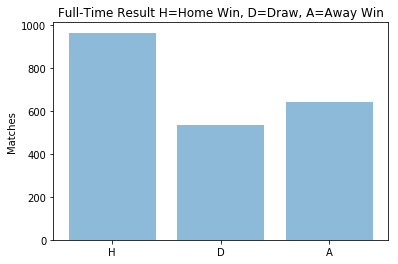

In [146]:
objects = ('H', 'D', 'A')
y_pos = np.arange(len(objects))
performance = [965, 533, 644]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Matches')
plt.title('Full-Time Result H=Home Win, D=Draw, A=Away Win')
 
plt.show()

- Home Win are the highest which is in-line with home advantage factors such as cheering crowd boosts player confidence, familiarity with ground on which they have practiced/played the most, influence in referre decision and less travel/fatigue.

### HTAG

In [114]:
# mean of HTAG column in train_data_bundesliga
print(np.mean(train_data_bundesliga['HTAG']))

# median of HTAG column in train_data_bundesliga
print(np.median(train_data_bundesliga['HTAG']))

# 1st and 3rd quartiles of HTAG column in train_data_bundesliga
print(train_data_bundesliga['HTAG'].quantile([0.25,0.5,0.75]))

0.5364145658263305
0.0
0.25    0.0
0.50    0.0
0.75    1.0
Name: HTAG, dtype: float64


- The variable `HTAG` has an approximate mean of 0.5 goals, median of 0 goals and 75th percentile value at 1 goal.

In [129]:
# convert 14 float type variables in train_data_bundesliga to int type  
train_data_bundesliga = train_data_bundesliga.astype({'AC': int,'AF': int, 'AR': int, 'AS': int, 'AST': int, 'AY': int, 'HC': int, 'HF': int, 'HR': int, 'HS': int, 'HST': int, 'HTAG': int, 'HTHG': int, 'HY': int})

In [130]:
# obtain counts for goals in HTAG column in train_data_bundesliga
print(np.array(np.unique(train_data_bundesliga['HTAG'], return_counts=True)).T)

[[   0 1241]
 [   1  693]
 [   2  171]
 [   3   35]
 [   4    1]
 [   5    1]]


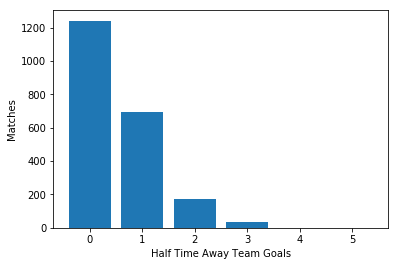

In [136]:
x = (0, 1, 2, 3, 4, 5)
y = (1241,693,171,35,1,1)

plt.bar(x,y,align='center') 
plt.xlabel('Half Time Away Team Goals')
plt.ylabel('Matches')

plt.show()

- Half Time Goal Statistics for Away Team
- In `1241` matches, an away team could not score a goal. 
- In `693` matches, an away team managed to score 1 goal.
- In `171` matches, an away team managed to score 2 goals.
- Atleast 3 goals have been scored in only 37 matches.

### HTAG and HTHG


In [143]:
x = train_data_bundesliga['HTHG']
y = train_data_bundesliga['HTAG']
np.corrcoef(x, y)

array([[ 1.        , -0.07208679],
       [-0.07208679,  1.        ]])

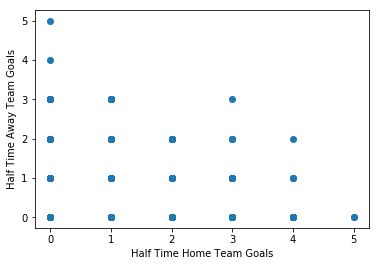

In [145]:
plt.scatter(x, y)
plt.xlabel('Half Time Home Team Goals')
plt.ylabel('Half Time Away Team Goals')
plt.show()

- The correlation is between `HTHG` (Half Time Home Team Goals) and `HTAG` (Half Time Away Team Goals). The result of the correlation is negative because the relation between the two variables is decremental. Correlation: `-0.07208679`

In [148]:
PH = 965/(965+533+644)
PD = 533/(965+533+644)
PA = 644/(965+533+644)
print(PH)
print(PD)
print(PA)

0.4505135387488329
0.2488328664799253
0.3006535947712418


In `bundesliga` league, `24.88%` have been a tie and `30.06%` have been a defeat for the home team.

In [151]:
HomeGoals = train_data_bundesliga['HTHG']
AwayGoals = train_data_bundesliga['HTAG']
TotalGoals = HomeGoals + AwayGoals 
print(np.array(np.unique(TotalGoals, return_counts=True)).T)

[[  0 595]
 [  1 749]
 [  2 530]
 [  3 209]
 [  4  48]
 [  5   9]
 [  6   2]]


In [163]:
a = train_data_bundesliga['FTR']
b = TotalGoals

FTRTotGoalTab = pd.crosstab(a, b, rownames = ['FTR'], colnames = ['TG'])
FTRTotGoalTab

TG,0,1,2,3,4,5,6
FTR,,,,,,,
A,154,241,165,68,12,3,1
D,228,155,115,28,6,1,0
H,213,353,250,113,30,5,1


In [188]:
A2Goals = sum(FTRTotGoalTab.loc["A",2:])
D2Goals = sum(FTRTotGoalTab.loc["D",2:])
H2Goals = sum(FTRTotGoalTab.loc["H",2:])

AGoals = sum(FTRTotGoalTab.loc["A"])
DGoals = sum(FTRTotGoalTab.loc["D"])
HGoals = sum(FTRTotGoalTab.loc["H"])

PA2Goals = A2Goals/AGoals
PD2Goals = D2Goals/DGoals
PH2Goals = H2Goals/HGoals

print(PA2Goals)
print(PD2Goals)
print(PH2Goals)

0.38664596273291924
0.28142589118198874
0.41347150259067356


- `38.66%` Away Team victories, atleast 2 goals have been scored
- `28.14%` Draws, atleast 2 goals have been scored
- `41.34%` Home Team victories, atleast 2 goals have been scored